In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install mplfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# Load the dataset
df = pd.read_csv("yahoo_aapl.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-Feb-25,248.00,249.98,244.91,247.04,247.04,"46,872,348"
1,24-Feb-25,244.93,248.86,244.42,247.10,247.10,"51,326,400"
2,21-Feb-25,245.95,248.69,245.22,245.55,245.55,"53,197,400"
3,20-Feb-25,244.94,246.78,244.29,245.83,245.83,"32,316,900"
4,19-Feb-25,244.66,246.01,243.16,244.87,244.87,"32,204,200"


In [19]:
df.shape


(2804, 7)

In [20]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [21]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2804 non-null   object 
 1   Open       2804 non-null   float64
 2   High       2804 non-null   float64
 3   Low        2804 non-null   float64
 4   Close      2804 non-null   float64
 5   Adj Close  2804 non-null   float64
 6   Volume     2804 non-null   object 
dtypes: float64(5), object(2)
memory usage: 153.5+ KB


In [23]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert Volume to numeric
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2804 non-null   datetime64[ns]
 1   Open       2804 non-null   float64       
 2   High       2804 non-null   float64       
 3   Low        2804 non-null   float64       
 4   Close      2804 non-null   float64       
 5   Adj Close  2804 non-null   float64       
 6   Volume     2804 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.5 KB


C:\Users\salma\AppData\Local\Temp\ipykernel_20092\3003691959.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [24]:
# Check date range
print("Start Date:", df["Date"].min())
print("End Date:", df["Date"].max())

Start Date: 2014-01-02 00:00:00
End Date: 2025-02-25 00:00:00


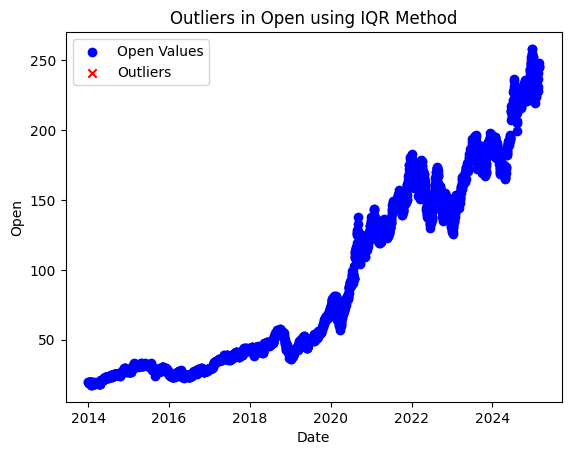

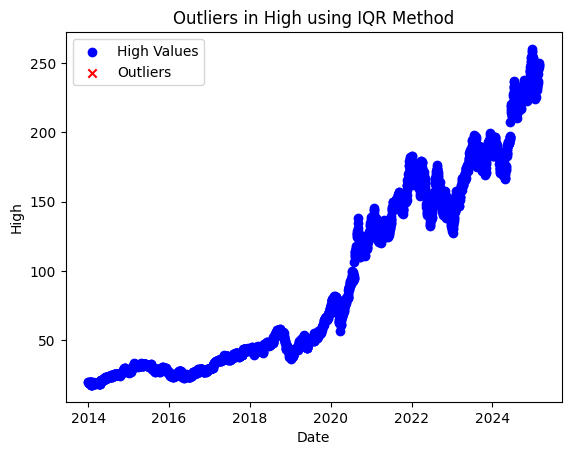

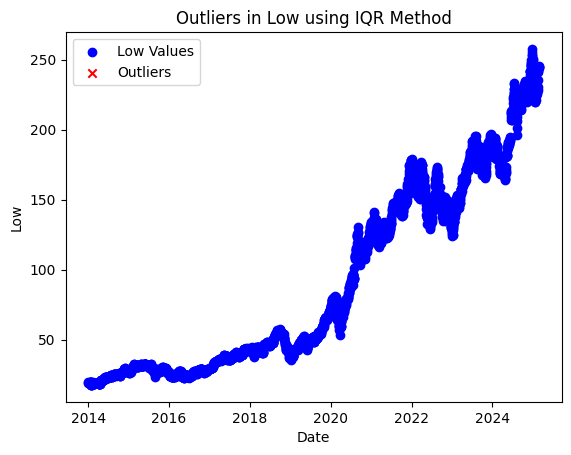

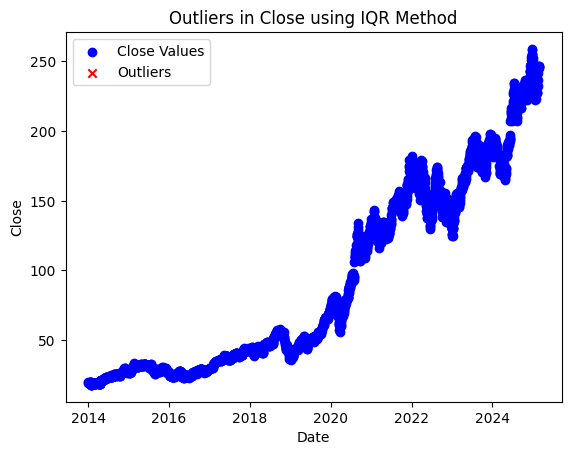

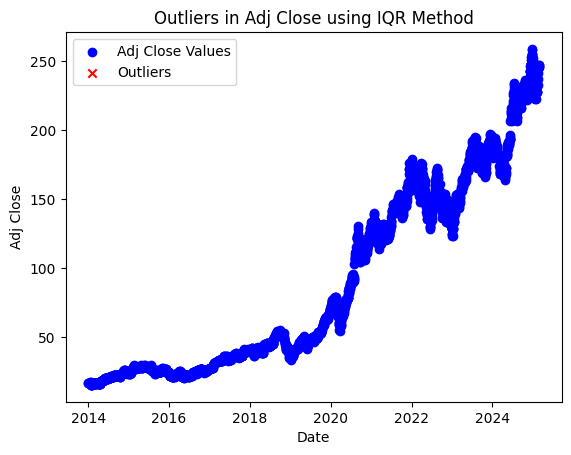

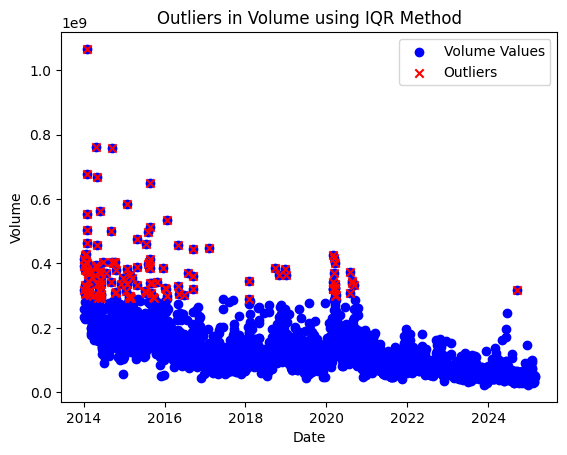

Column: Open, Outliers detected: 0
Column: High, Outliers detected: 0
Column: Low, Outliers detected: 0
Column: Close, Outliers detected: 0
Column: Adj Close, Outliers detected: 0
Column: Volume, Outliers detected: 132


In [11]:
#Check Outliers
# Select only numerical columns (skip non-numeric ones like 'Date')
numeric_cols = df.select_dtypes(include=["number"]).columns

# Dictionary to store outliers for each column
outliers_dict = {}

# Loop through all numerical columns
for col in numeric_cols:
    # Compute IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers for this column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Store in dictionary
    outliers_dict[col] = outliers

    # Plot scatter plot for each column
    plt.scatter(df["Date"], df[col], label=f"{col} Values", color="blue")
    plt.scatter(outliers["Date"], outliers[col], color="red", label="Outliers", marker="x")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.title(f"Outliers in {col} using IQR Method")
    plt.show()

# Print number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"Column: {col}, Outliers detected: {len(outliers)}")

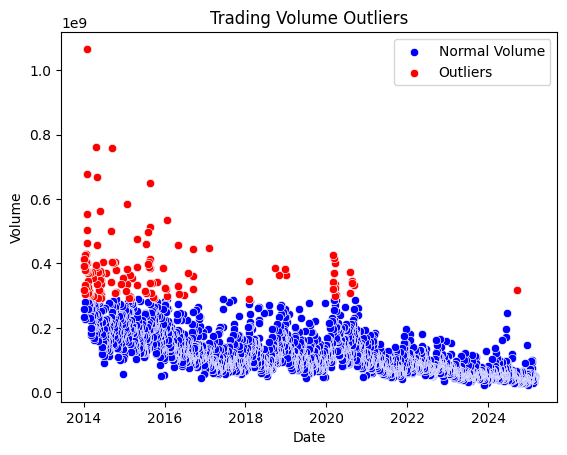

In [12]:
# Scatter plot for volume
sns.scatterplot(x=df["Date"], y=df["Volume"], color="blue", label="Normal Volume")

# Highlight Outliers
outlier_volume = df[(df["Volume"] > upper_bound) | (df["Volume"] < lower_bound)]
sns.scatterplot(x=outlier_volume["Date"], y=outlier_volume["Volume"], color="red", label="Outliers")

plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Outliers")
plt.legend()
plt.show()


In [13]:
# Show outlier dates
print(outlier_volume[["Date", "Volume"]])

           Date       Volume
106  2024-09-20  318679900.0
1122 2020-09-04  332607200.0
1131 2020-08-24  345937600.0
1132 2020-08-21  338054800.0
1146 2020-08-03  308151200.0
...         ...          ...
2796 2014-01-13  378492800.0
2797 2014-01-10  304976000.0
2800 2014-01-07  317209200.0
2801 2014-01-06  412610800.0
2802 2014-01-03  392467600.0

[132 rows x 2 columns]


In [14]:
top_outliers = outlier_volume.sort_values(by="Volume", ascending=False).head(5)
print(top_outliers[["Date", "Volume"]])


           Date        Volume
2786 2014-01-28  1.065523e+09
2726 2014-04-24  7.599116e+08
2631 2014-09-09  7.593852e+08
2784 2014-01-30  6.785016e+08
2724 2014-04-28  6.694856e+08


# Visualization

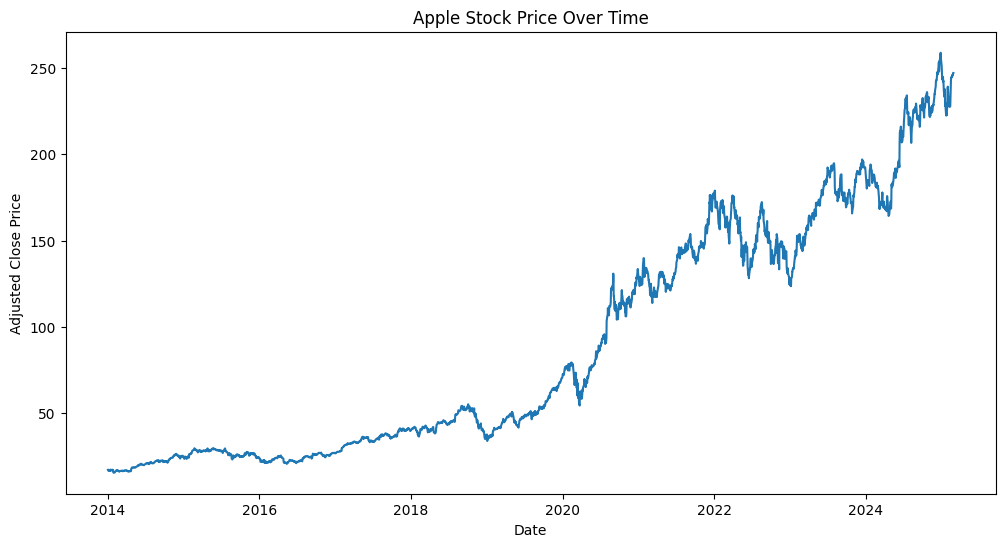

In [52]:
# How does the stock price change over time?
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=df)
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()


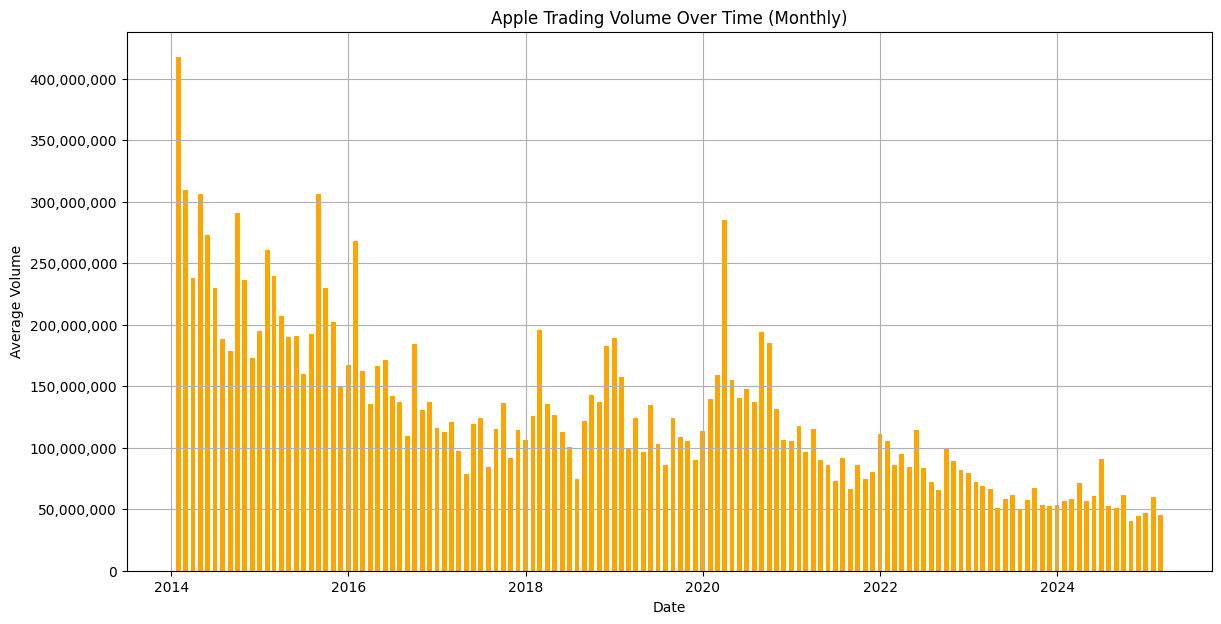

In [54]:
## How does the trading volume change over time?
import matplotlib.ticker as ticker
# Group by Month and calculate the average Volume
monthly_volume = df.resample('ME', on='Date').mean()

# Plot
plt.figure(figsize=(14, 7))
plt.bar(monthly_volume.index, monthly_volume['Volume'], color='orange', width=20)
plt.title('Apple Trading Volume Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis with commas
plt.show()


<ipython-input-55-ced0c0176b85>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




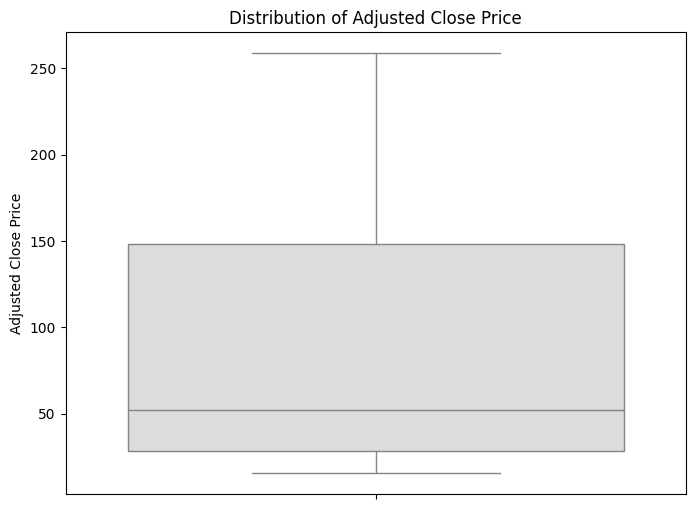

In [55]:
# What was the highest and lowest price?
plt.figure(figsize=(8, 6))
sns.boxplot(y='Adj Close', data=df, palette='coolwarm')
plt.title("Distribution of Adjusted Close Price")
plt.ylabel("Adjusted Close Price")
plt.show()


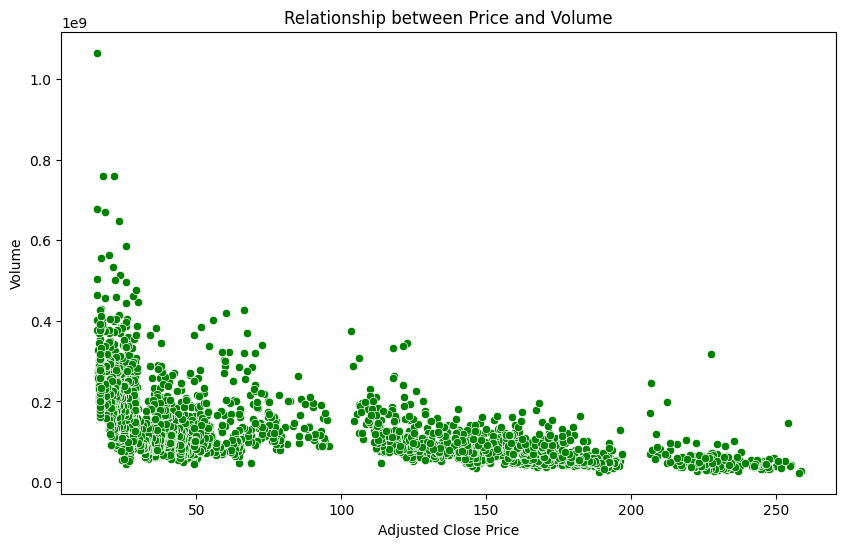

In [56]:
#Is there a relationship between Price and Volume?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', data=df, color='green')
plt.title("Relationship between Price and Volume")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Volume")
plt.show()


<ipython-input-57-6fd96d7bab48>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




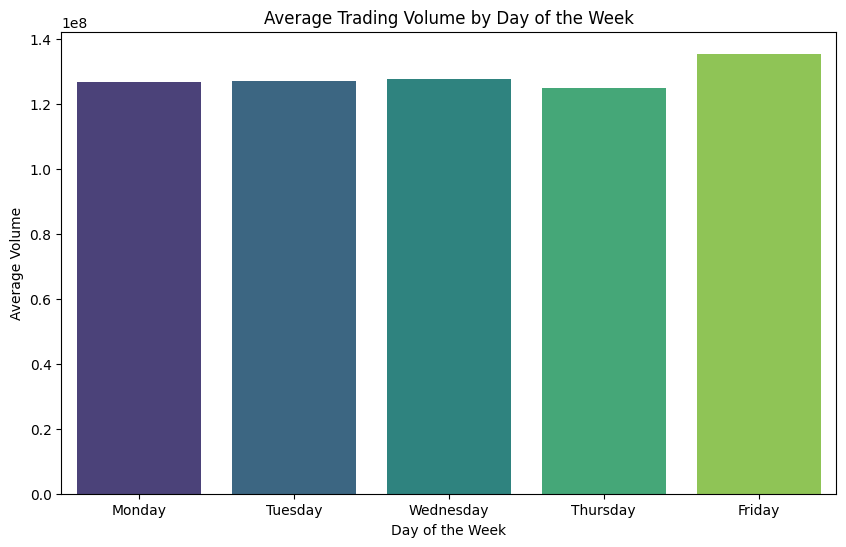

In [57]:
#When were the busiest trading days?

df['DayOfWeek'] = df['Date'].dt.day_name()
volume_by_day = df.groupby('DayOfWeek')['Volume'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_by_day.index, y=volume_by_day.values, palette='viridis')
plt.title("Average Trading Volume by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Volume")
plt.show()


<ipython-input-58-c128f56fd475>:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

<ipython-input-58-c128f56fd475>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




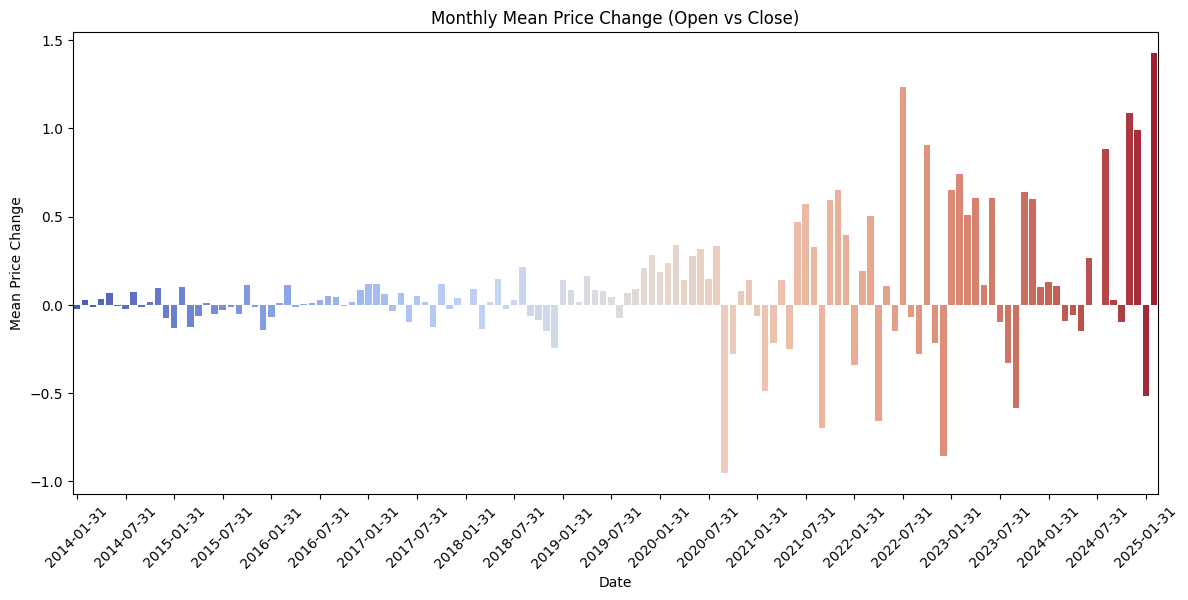

In [58]:
#How much does the stock price change each day?

df['Daily Change'] = df['Close'] - df['Open']
monthly_change = df.resample('M', on='Date')['Daily Change'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='Date', y='Daily Change', data=monthly_change, palette='coolwarm')
plt.title("Monthly Mean Price Change (Open vs Close)")
plt.xlabel("Date")
plt.ylabel("Mean Price Change")
plt.xticks(ticks=plt.xticks()[0][::6], rotation=45)
plt.show()



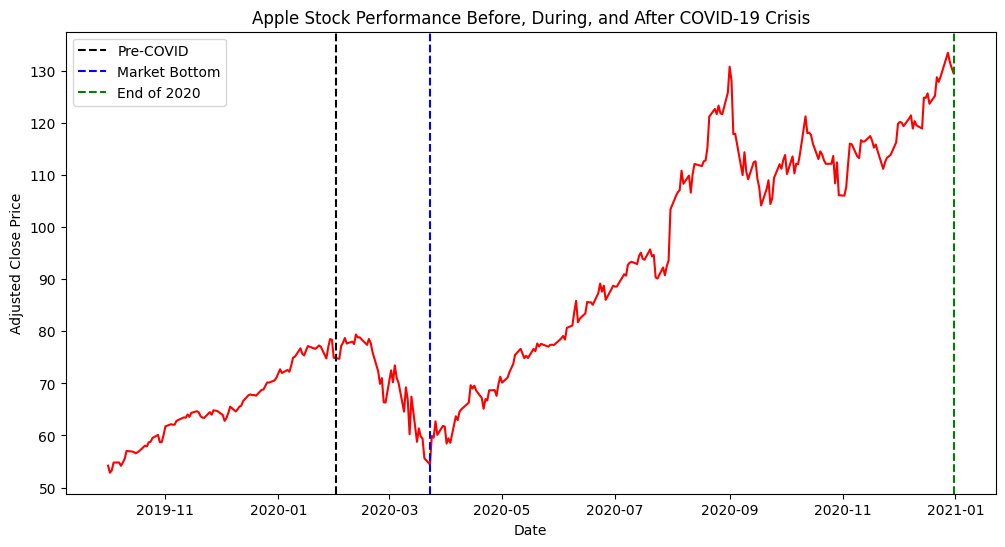

In [59]:
#How did Apple stock perform during the COVID-19 crisis

# Define time frame (Before & After COVID Market Crash)
covid_period_extended = df[(df['Date'] >= '2019-10-01') & (df['Date'] <= '2020-12-31')]

# Plot stock performance over COVID-19 period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=covid_period_extended, color='red')
plt.axvline(pd.Timestamp('2020-02-01'), color='black', linestyle='dashed', label='Pre-COVID')
plt.axvline(pd.Timestamp('2020-03-23'), color='blue', linestyle='dashed', label='Market Bottom')
plt.axvline(pd.Timestamp('2020-12-31'), color='green', linestyle='dashed', label='End of 2020')

# plot
plt.title("Apple Stock Performance Before, During, and After COVID-19 Crisis")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


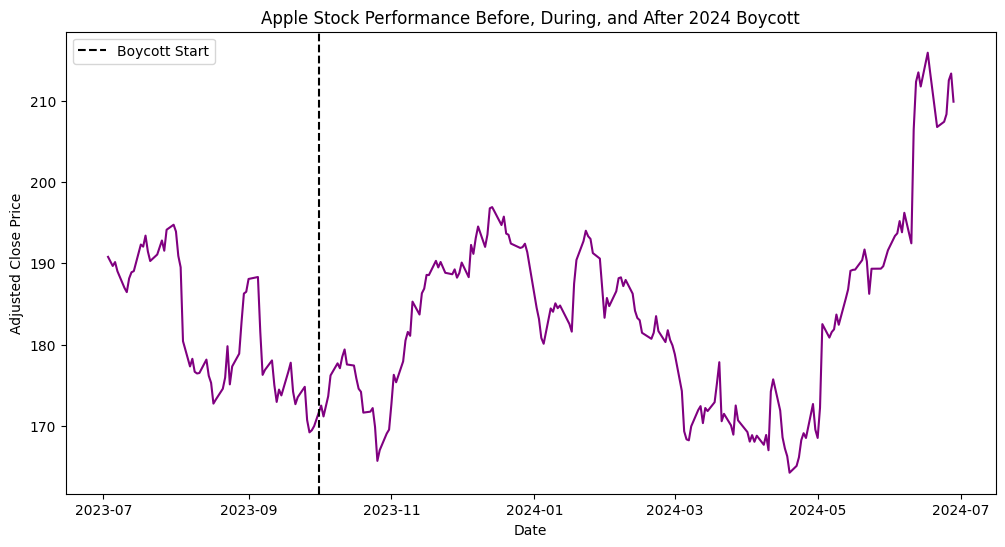

In [60]:
#How did Boycott affect Apple's stock price?

# Define time frame (Before & After the Boycott)
boycott_period_extended = df[(df['Date'] >= '2023-07-01') & (df['Date'] <= '2024-06-30')]

# Plot stock performance over boycott period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Adj Close', data=boycott_period_extended, color='purple')
plt.axvline(pd.Timestamp('2023-10-01'), color='black', linestyle='dashed', label='Boycott Start')

# plot
plt.title("Apple Stock Performance Before, During, and After 2024 Boycott")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()


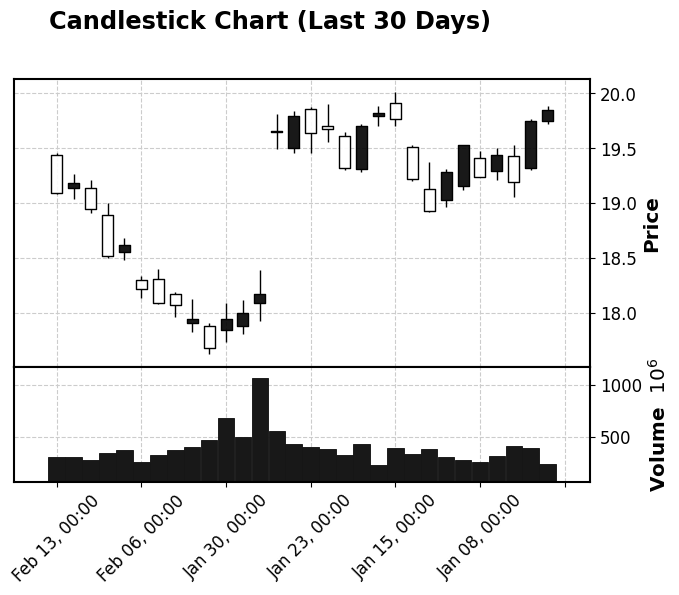

In [64]:
#How did Apple's stock price move in the last 30 days?
import mplfinance as mpf
# Prepare Data for Candlestick Chart
df_candle = df.set_index('Date')  # Set Date as index
df_candle = df_candle[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot Candlestick Chart
mpf.plot(df_candle.tail(30), type='candle', style='classic', title='Candlestick Chart (Last 30 Days)',
         ylabel='Price', volume=True)


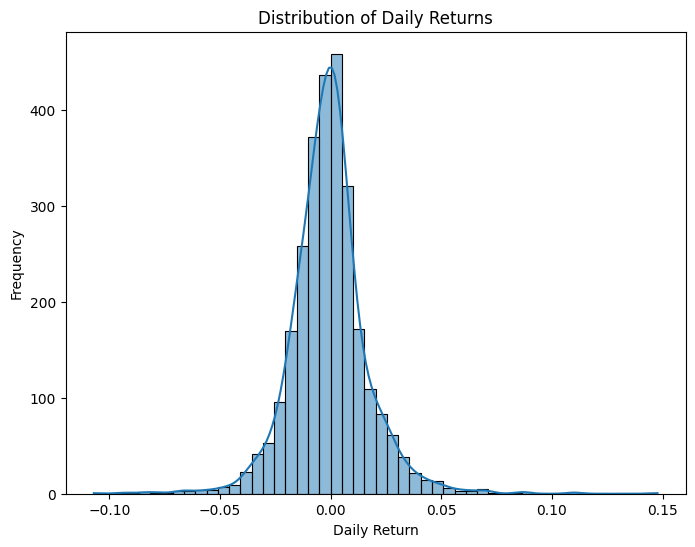

count    2803.000000
mean       -0.000795
std         0.017608
min        -0.107026
25%        -0.010007
50%        -0.000945
75%         0.007108
max         0.147669
Name: DailyReturn, dtype: float64


In [15]:
# Calculate daily returns
df["DailyReturn"] = df["Adj Close"].pct_change()  

# Plot the distribution of daily returns
plt.figure(figsize=(8, 6))
sns.histplot(df["DailyReturn"].dropna(), bins=50, kde=True) 

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print(df["DailyReturn"].describe()) 